In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')




# Surprise Housing - Assignment for Multi-linear Regression #

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.


# Step 1: Exploratory Data Analysis

The first step is to load the file and cleanup the input data using EDA. This is needed prior to commencement of analysis.

In [2]:
sh_datafile = pd.read_csv("C:\\technology\\upgrad\\SurpriseHousing\\SurpriseHousing\\train.csv")

sh_datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Step 1.1 : Finding null columns and eliminating them. ####

In [3]:
# Finding null columns

print(sh_datafile.isnull().sum()[sh_datafile.isnull().sum()==1460])



Series([], dtype: int64)


No such null columns exist. 

#### Step 1.2 : Check for columns having one single value. ####

In [4]:
unique_count_of_values = sh_datafile.nunique()

print(unique_count_of_values[unique_count_of_values==1].index.tolist())

[]


No columns with unique count of values present.

#### Step 1.3 : Check for columns with unique count of values. ####

In [5]:
#check missing percentage
percent_missing = ((sh_datafile.isna().sum() / 1460)*100).sort_values(ascending = False)
print(percent_missing.head(40))

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

Following columns 

1. PoolQC(99.520548),
2. MiscFeature(96.301370),
3. Alley(93.767123),
4. Fence(80.753425), 
5. MasVnrType( 59.726027) & 
6. FireplaceQu(47.260274) 

which are having high missing values('NA'). These needs to be dropped as they don't serve for any meaningful analysis.

In [6]:
sh_datafile.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1,inplace=True)

sh_datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Step 1.4 :  Dropping columns which are not adding values to analysis based on domain. ####

In [7]:
sh_datafile.drop(['YearBuilt','YearRemodAdd','TotalBsmtSF','YrSold','MoSold','GarageYrBlt'],axis=1,inplace=True)

sh_datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

#### Step 1.5 : Need to impute values for missing values using median. ####

First, we need to identify % of values having large number of zeros

In [8]:
selected_columns =['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','ScreenPorch', \
                             '3SsnPorch','PoolArea','MiscVal','WoodDeckSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath', \
                             'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','WoodDeckSF','OpenPorchSF','EnclosedPorch']

percent_of_zeroes = ((sh_datafile[selected_columns] == 0).sum()/1460)*100


print(percent_of_zeroes)              

LotFrontage       0.000000
LotArea           0.000000
MasVnrArea       58.972603
BsmtFinSF1       31.986301
BsmtFinSF2       88.561644
BsmtUnfSF         8.082192
ScreenPorch      92.054795
3SsnPorch        98.356164
PoolArea         99.520548
MiscVal          96.438356
WoodDeckSF       52.123288
1stFlrSF          0.000000
2ndFlrSF         56.780822
LowQualFinSF     98.219178
BsmtFullBath     58.630137
BsmtHalfBath     94.383562
FullBath          0.616438
HalfBath         62.534247
BedroomAbvGr      0.410959
KitchenAbvGr      0.068493
TotRmsAbvGrd      0.000000
WoodDeckSF       52.123288
OpenPorchSF      44.931507
EnclosedPorch    85.753425
dtype: float64


Dropping columns which have high % of zeroes.

In [9]:
sh_datafile.drop(['BsmtFinSF2','ScreenPorch','3SsnPorch','PoolArea','MiscVal','LowQualFinSF','EnclosedPorch'],axis=1,inplace=True)

sh_datafile.info()

sh_datafile.to_csv('train_temp.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

Now imputing the values for continuous variables. Can be done only for 

1. LotFrontage
2. MasVnrArea


In [10]:
sh_datafile[['LotFrontage','MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,1201.000000,1452.000000
mean,70.049958,103.685262
std,24.284752,181.066207
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,313.000000,1600.000000


In [11]:
#Imputing values

sh_datafile['LotFrontage'] = sh_datafile['LotFrontage'].fillna(sh_datafile.LotFrontage.median())
sh_datafile['MasVnrArea'] = sh_datafile['MasVnrArea'].fillna(sh_datafile.MasVnrArea.mean())

sh_datafile.to_csv('train_temp.csv')


# Find the count of each unique value in each column


Imputing values for categorical variables.

In [12]:

selected_columns = ['GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','Electrical']

for column in selected_columns:
    value_counts = sh_datafile[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")


Value counts for GarageCond:
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

Value counts for GarageType:
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

Value counts for GarageFinish:
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

Value counts for GarageQual:
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

Value counts for BsmtFinType2:
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

Value counts for BsmtExposure:
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

Value counts for BsmtQual:
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

Value counts for BsmtCond:
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

Value counts for BsmtFinType1:


Imputing the values based on the max possible value

In [13]:
sh_datafile['GarageCond'] = sh_datafile['GarageCond'].fillna('TA')
sh_datafile['GarageType'] = sh_datafile['GarageType'].fillna('Attchd')
sh_datafile['GarageFinish'] = sh_datafile['GarageFinish'].fillna('Unf')
sh_datafile['GarageQual'] = sh_datafile['GarageQual'].fillna('TA')
sh_datafile['GarageQual'] = sh_datafile['GarageQual'].fillna('TA')
sh_datafile['BsmtFinType2'] = sh_datafile['BsmtFinType2'].fillna('Unf')
sh_datafile['BsmtExposure'] = sh_datafile['BsmtExposure'].fillna('No')
sh_datafile['BsmtQual'] = sh_datafile['BsmtQual'].fillna('TA')
sh_datafile['BsmtCond'] = sh_datafile['BsmtCond'].fillna('TA')
sh_datafile['BsmtFinType1'] = sh_datafile['BsmtFinType1'].fillna('Unf')
sh_datafile['Electrical'] = sh_datafile['Electrical'].fillna('SBrkr')

Now check for missing values again

In [14]:
#check missing percentage
percent_missing = ((sh_datafile.isna().sum() / 1460)*100).sort_values(ascending = False)
print(percent_missing.head(40))

Id               0.0
KitchenQual      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
MSSubClass       0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
SaleType         0.0
SaleCondition    0.0
BsmtUnfSF        0.0
BsmtFinType2     0.0
BsmtFinSF1       0.0
BsmtFinType1     0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
dtype: float64


No values are missing currently.

In [15]:
sh_datafile.to_csv('train_temp.csv')

#### Step 1.6 : Now plotting the Categorical variables to check on the distribution of values. ####



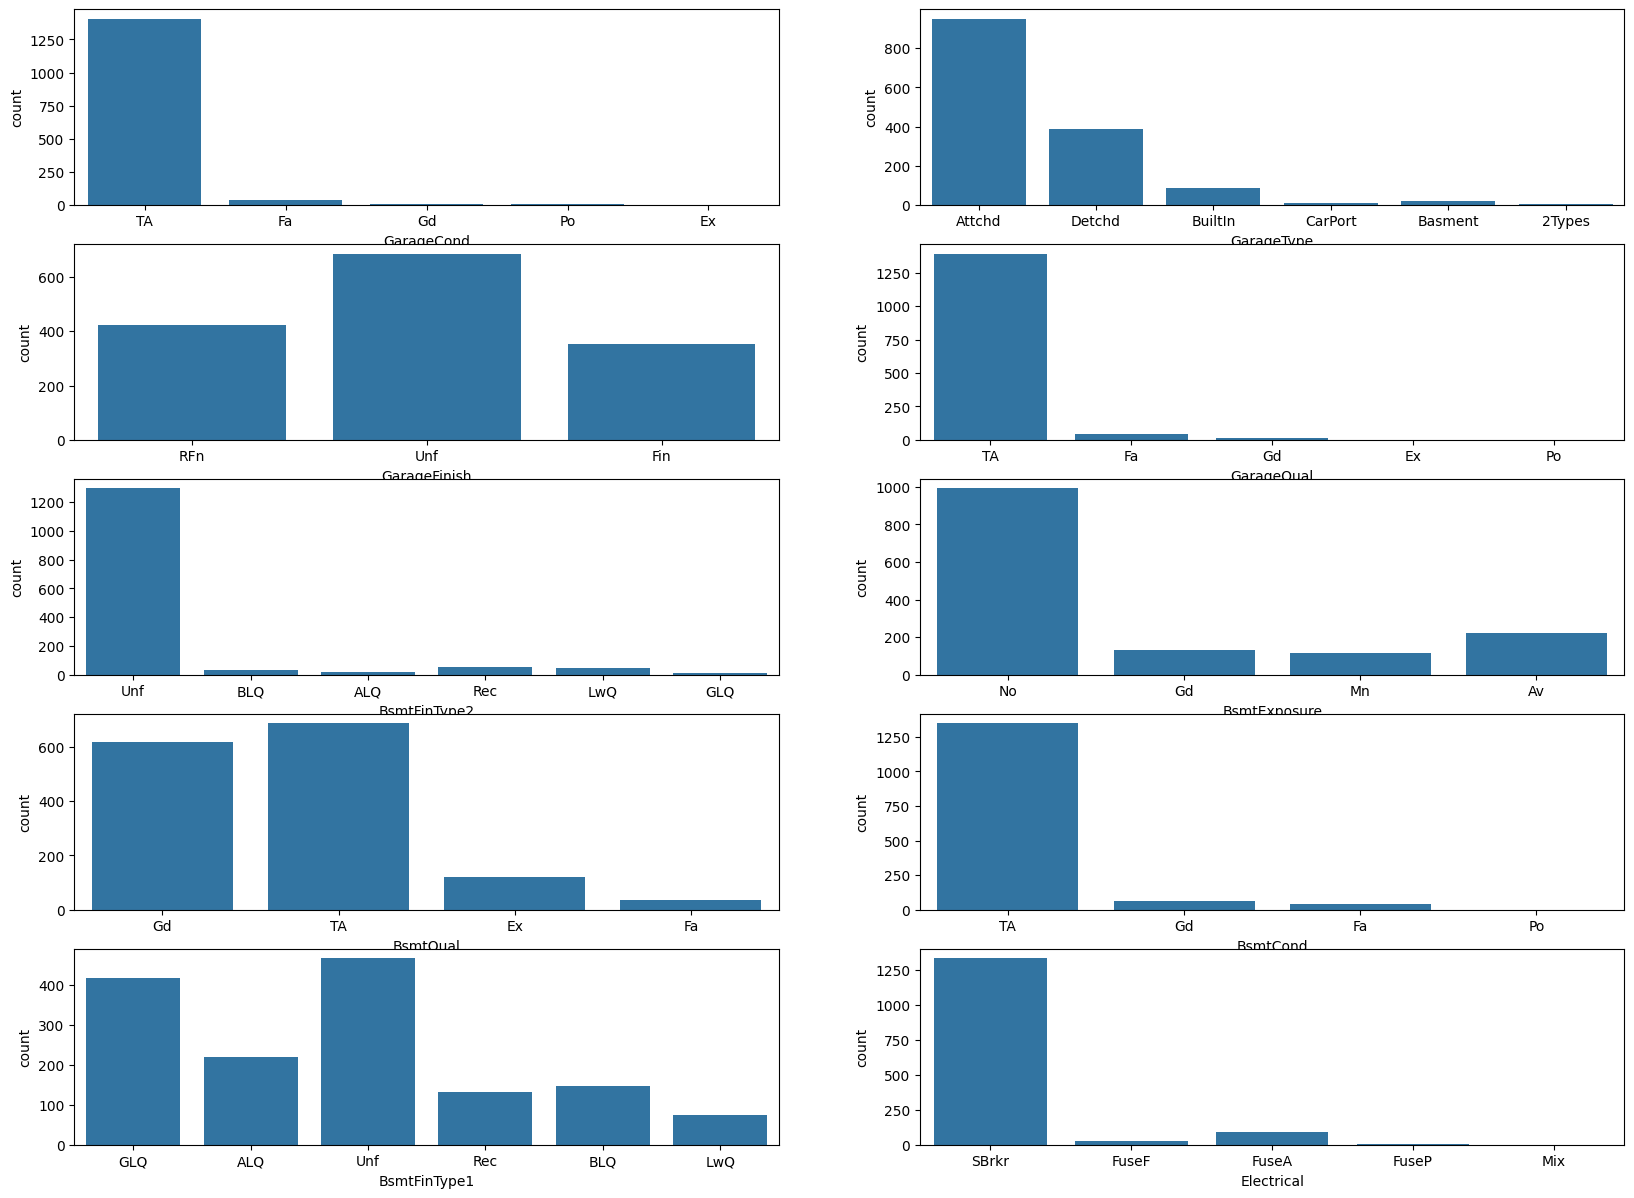

In [16]:
plt.figure(figsize=(20,30))

plt.subplot(10,2,1)
sns.countplot(x='GarageCond',data=sh_datafile)

plt.subplot(10,2,2)
sns.countplot(x='GarageType',data=sh_datafile)

plt.subplot(10,2,3)
sns.countplot(x='GarageFinish',data=sh_datafile)

plt.subplot(10,2,4)
sns.countplot(x='GarageQual',data=sh_datafile)

plt.subplot(10,2,5)
sns.countplot(x='BsmtFinType2',data=sh_datafile)
   
plt.subplot(10,2,6)
sns.countplot(x='BsmtExposure',data=sh_datafile)

plt.subplot(10,2,7)
sns.countplot(x='BsmtQual',data=sh_datafile)

plt.subplot(10,2,8)
sns.countplot(x='BsmtCond',data=sh_datafile)

plt.subplot(10,2,9)
sns.countplot(x='BsmtFinType1',data=sh_datafile)

plt.subplot(10,2,10)
sns.countplot(x='Electrical',data=sh_datafile)

plt.show()


Following attributes are identified to predominate with one value and will be dropped

1. GarageCond
2. GarageQual
3. BsmntFinType2
4. BsmtExposure
5. BsmtCond
6. Electrical

Following attributes will be combined

1. Garage Type
    - Carport
    - Basement
    - 2Types
2. BsmtQual
    - Ex
    - Fa
3. BsmntFinType1
       - Rec
       - BLQ
       - LwQ 

Following attributes will be used AS-IS

1. Garage Finish

Continuing analysis on the next set of values.

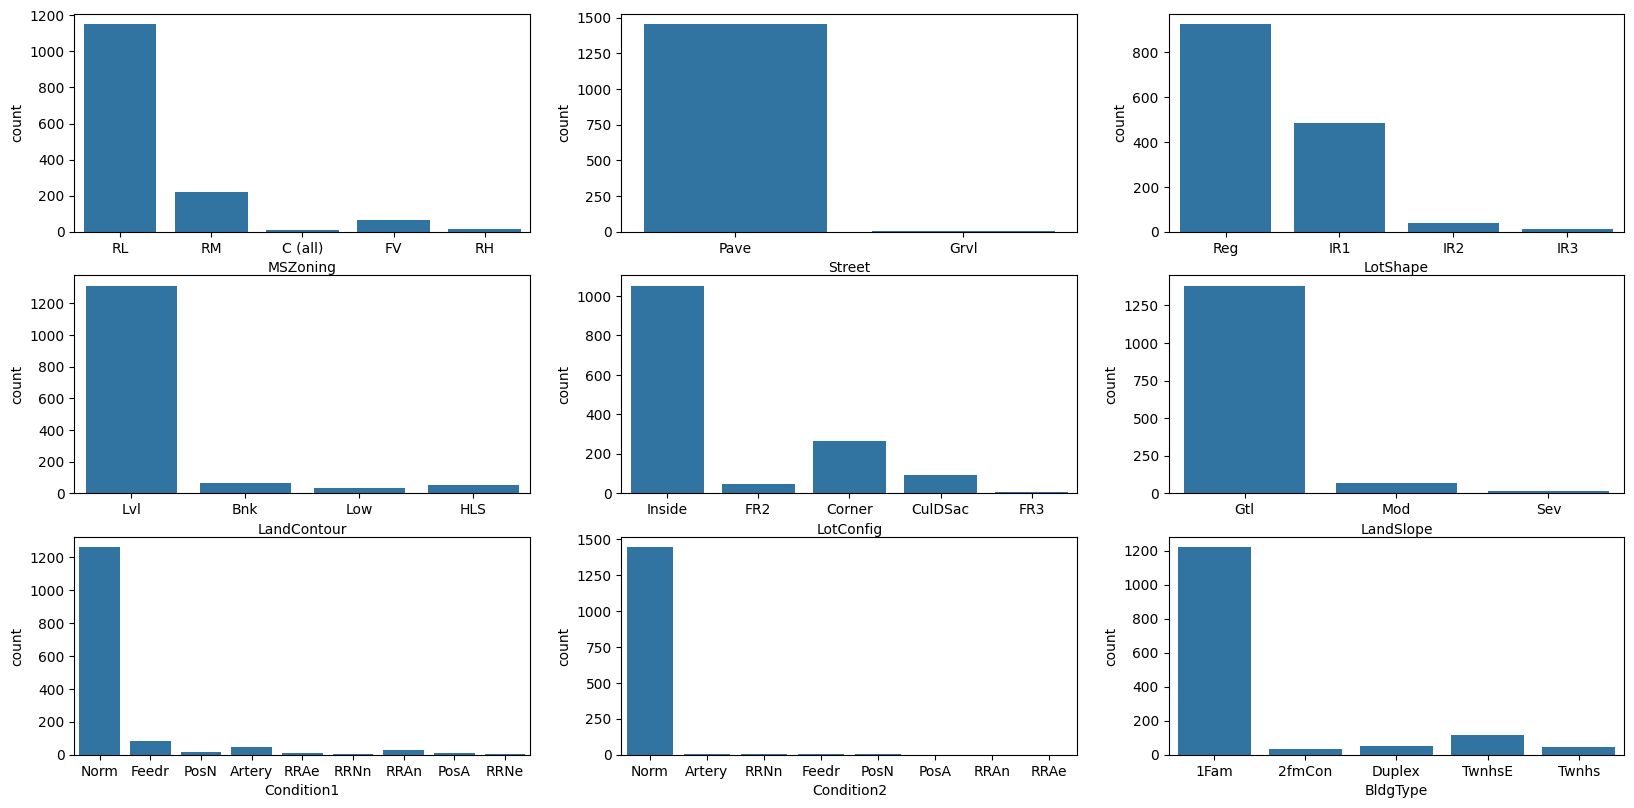

In [17]:
plt.figure(figsize=(20,30))

plt.subplot(9,3,1)
sns.countplot(x='MSZoning',data=sh_datafile)

plt.subplot(9,3,2)
sns.countplot(x='Street',data=sh_datafile)

plt.subplot(9,3,3)
sns.countplot(x='LotShape',data=sh_datafile)

plt.subplot(9,3,4)
sns.countplot(x='LandContour',data=sh_datafile)

plt.subplot(9,3,5)
sns.countplot(x='LotConfig',data=sh_datafile)
    
plt.subplot(9,3,6)
sns.countplot(x='LandSlope',data=sh_datafile)

plt.subplot(9,3,7)
sns.countplot(x='Condition1',data=sh_datafile)

plt.subplot(9,3,8)
sns.countplot(x='Condition2',data=sh_datafile)

plt.subplot(9,3,9)
sns.countplot(x='BldgType',data=sh_datafile)

plt.show()



Following attributes are identified to predominate with one value and will be dropped

1. MSZoning
2. Street
3. LandContour
4. LandSlope
5. Condition1
6. Condition2
7. BldgType

For the following attributes, the values will be combined.

1. LotShape
    - IR2
    - IR3
2. LotConfig
    - FR2
    - CulDSac
    - FR3


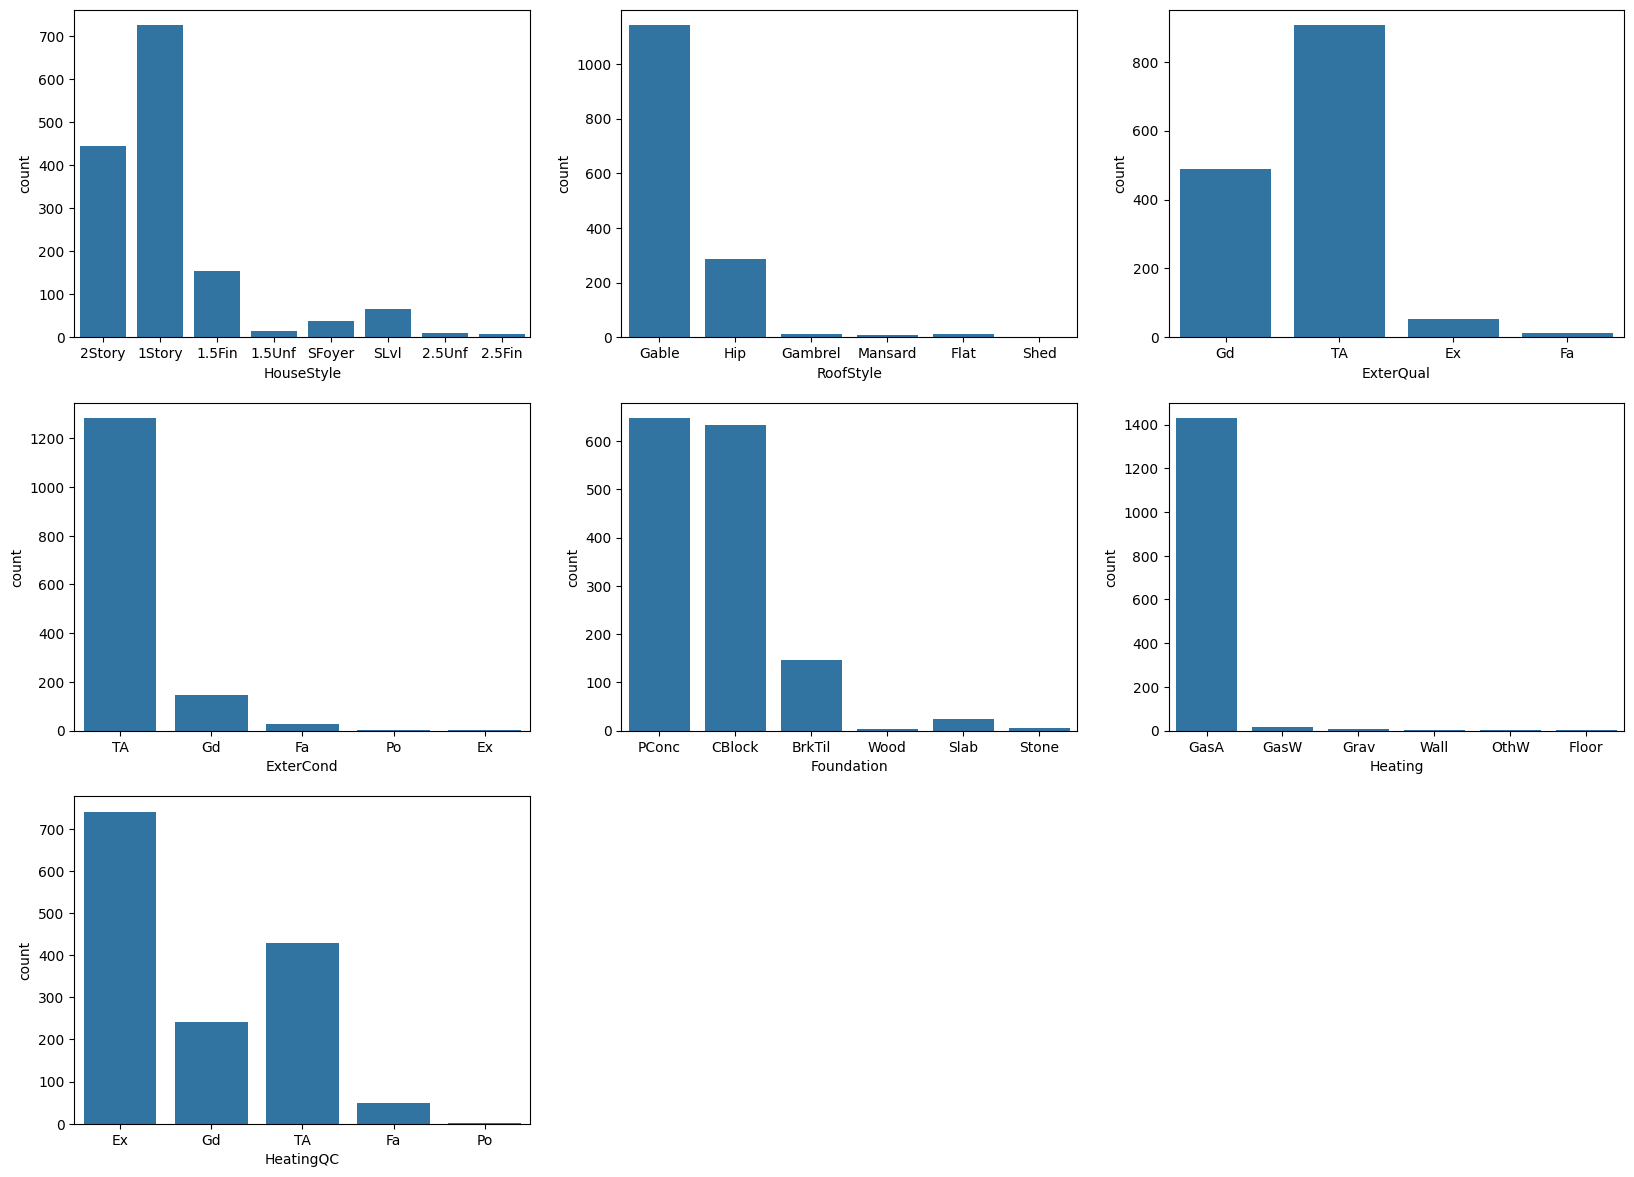

In [18]:
plt.figure(figsize=(20,40))

plt.subplot(8,3,1)
sns.countplot(x='HouseStyle',data=sh_datafile)

plt.subplot(8,3,2)
sns.countplot(x='RoofStyle',data=sh_datafile)

plt.subplot(8,3,3)
sns.countplot(x='ExterQual',data=sh_datafile)

plt.subplot(8,3,4)
sns.countplot(x='ExterCond',data=sh_datafile)

plt.subplot(8,3,5)
sns.countplot(x='Foundation',data=sh_datafile)

plt.subplot(8,3,6)
sns.countplot(x='Heating',data=sh_datafile)

plt.subplot(8,3,7)
sns.countplot(x='HeatingQC',data=sh_datafile)


plt.show()

Following attributes are identified to predominate with one value and will be dropped

1. ExterCond
2. Heating

The folllowing columns will be combined together since they occur far less

1. HouseStyle
    - 1.5Fin
    - 1.5Unf
    - SFoyer
    - SLvl
    - 2.5Unf
    - 2.5Fin
2. RoofStyle
    - Gambrel
    - Mansard
    - Flat
    - Shed
3. ExterQual
    - Ex
    - Fa

4. Foundation
    - BrkTil
    - Wood
    - Slab
    - Stone
5. HeatingQC
    - Gd
    - Fa
    - Po

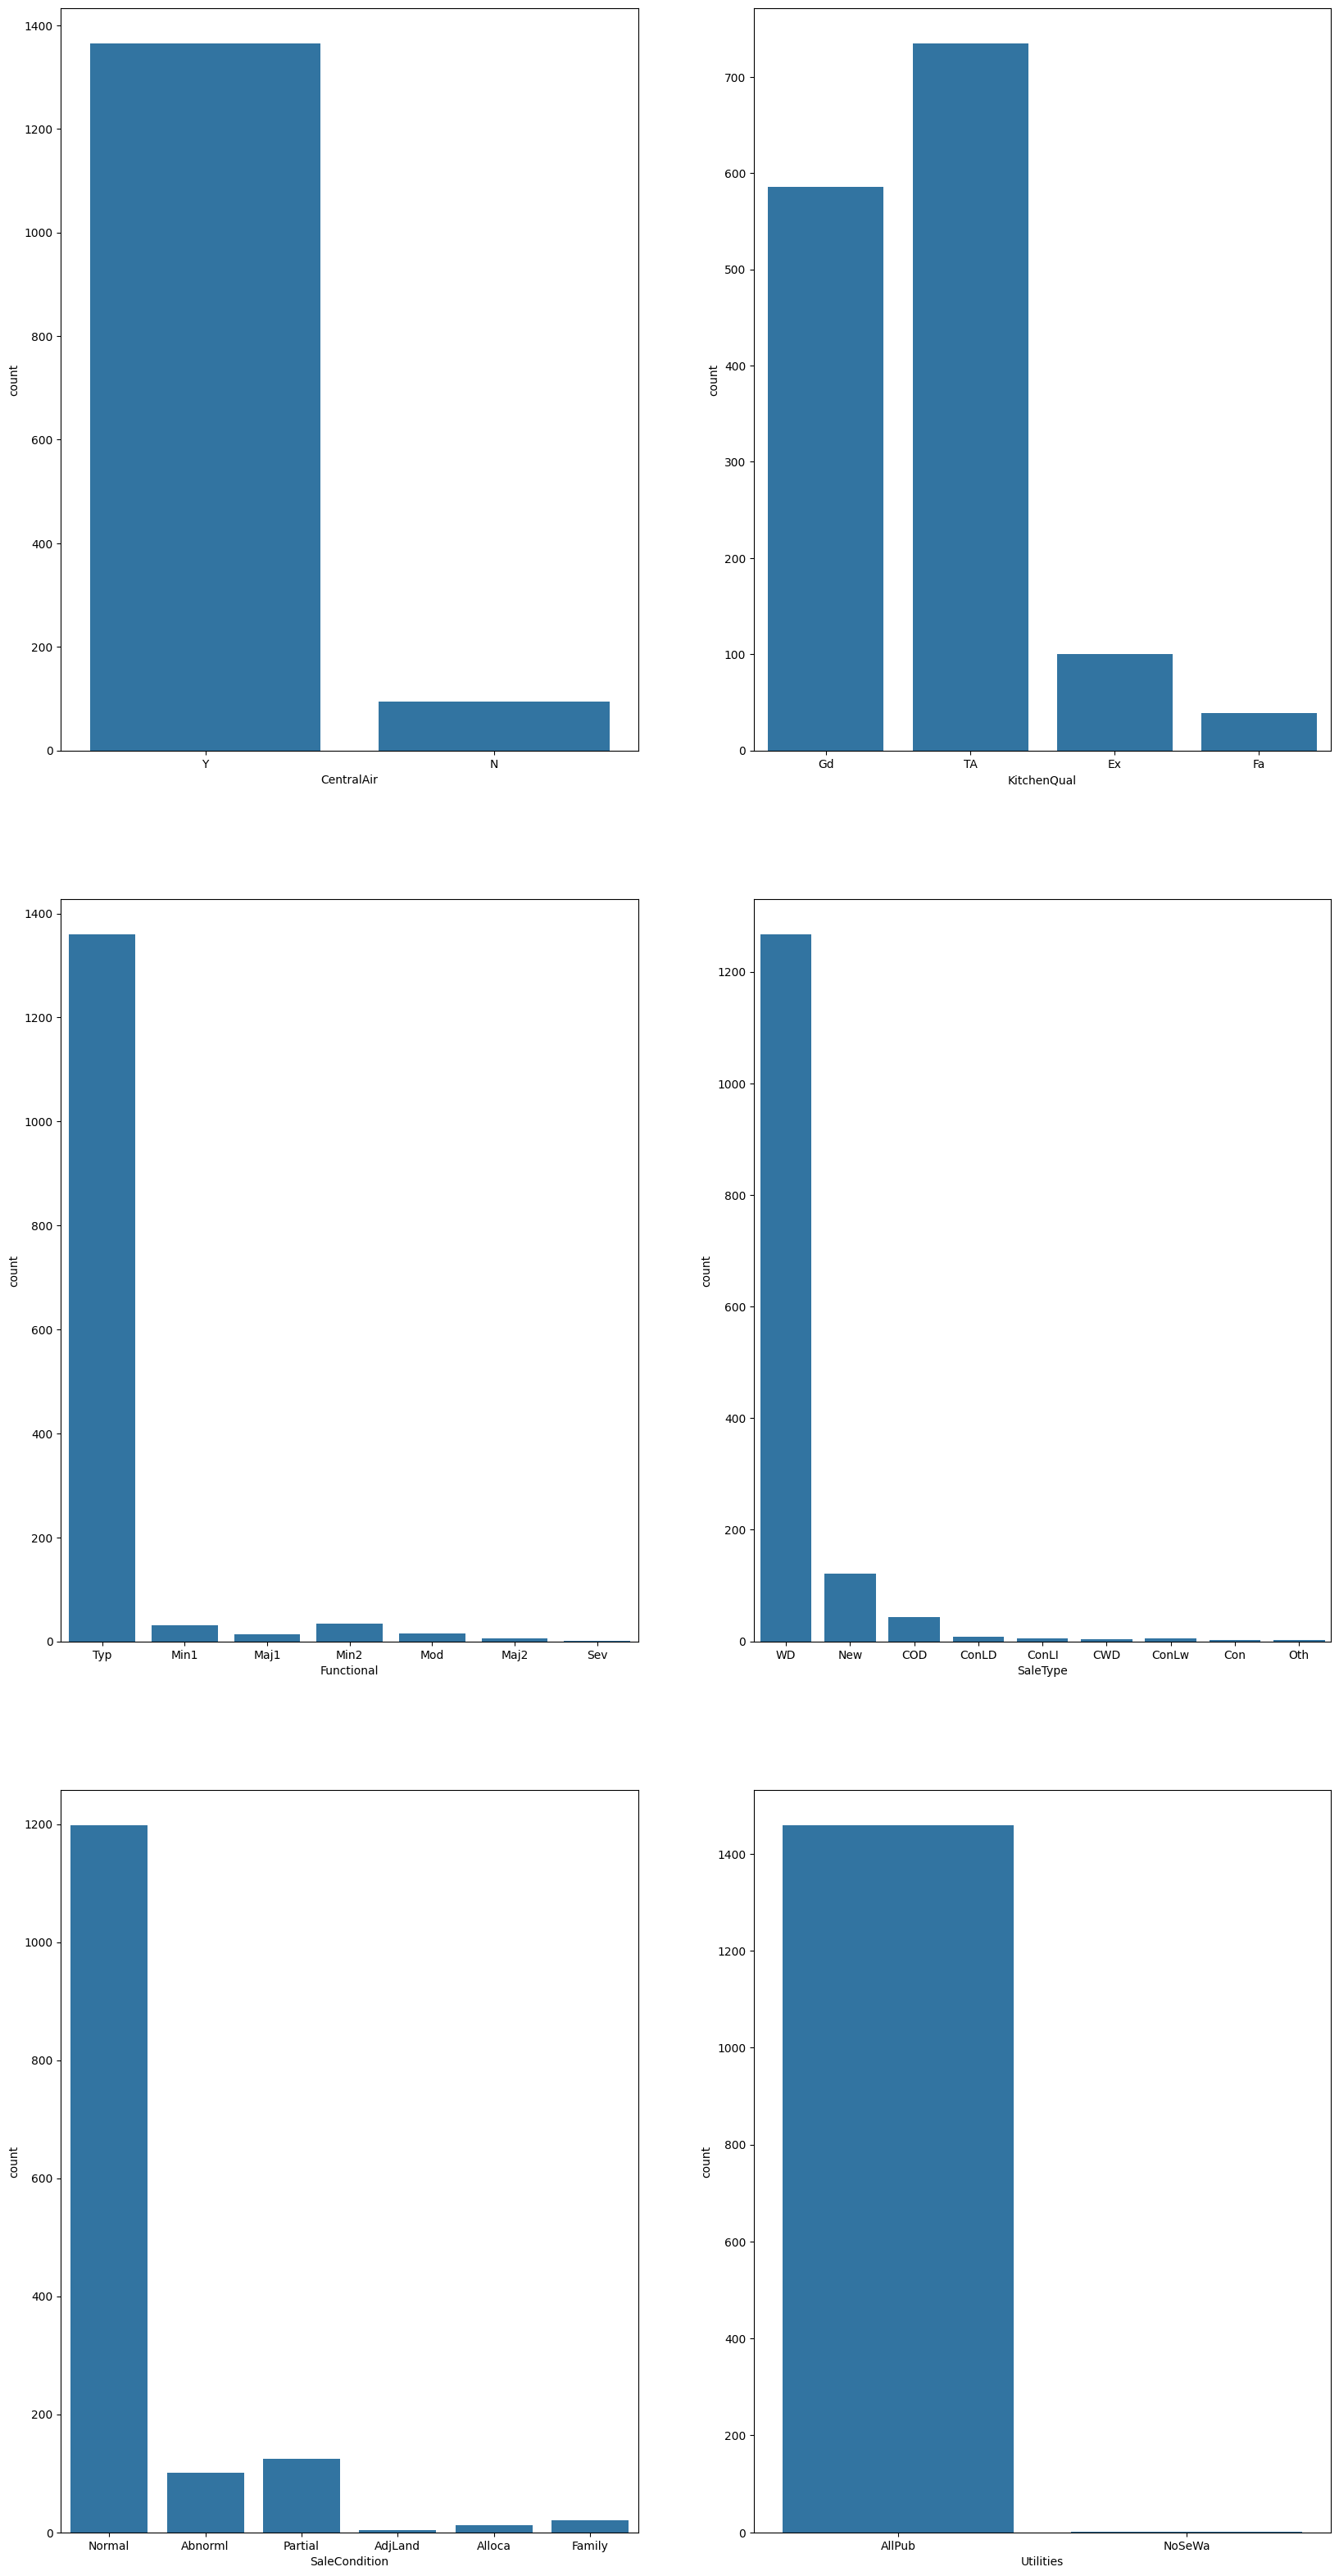

In [19]:
plt.figure(figsize=(20,40))

plt.subplot(3,2,1)
sns.countplot(x='CentralAir',data=sh_datafile)

plt.subplot(3,2,2)
sns.countplot(x='KitchenQual',data=sh_datafile)

plt.subplot(3,2,3)
sns.countplot(x='Functional',data=sh_datafile)

plt.subplot(3,2,4)
sns.countplot(x='SaleType',data=sh_datafile)

plt.subplot(3,2,5)
sns.countplot(x='SaleCondition',data=sh_datafile)

plt.subplot(3,2,6)
sns.countplot(x='Utilities',data=sh_datafile)

plt.show()

Following attributes are identified to predominate with one value and will be dropped

1. CentralAir
2. Functional
3. SaleType
4. SaleCondition
5. Utilities

Following variables will be combined

1. KitchenQual
    - Ex
    - Fa


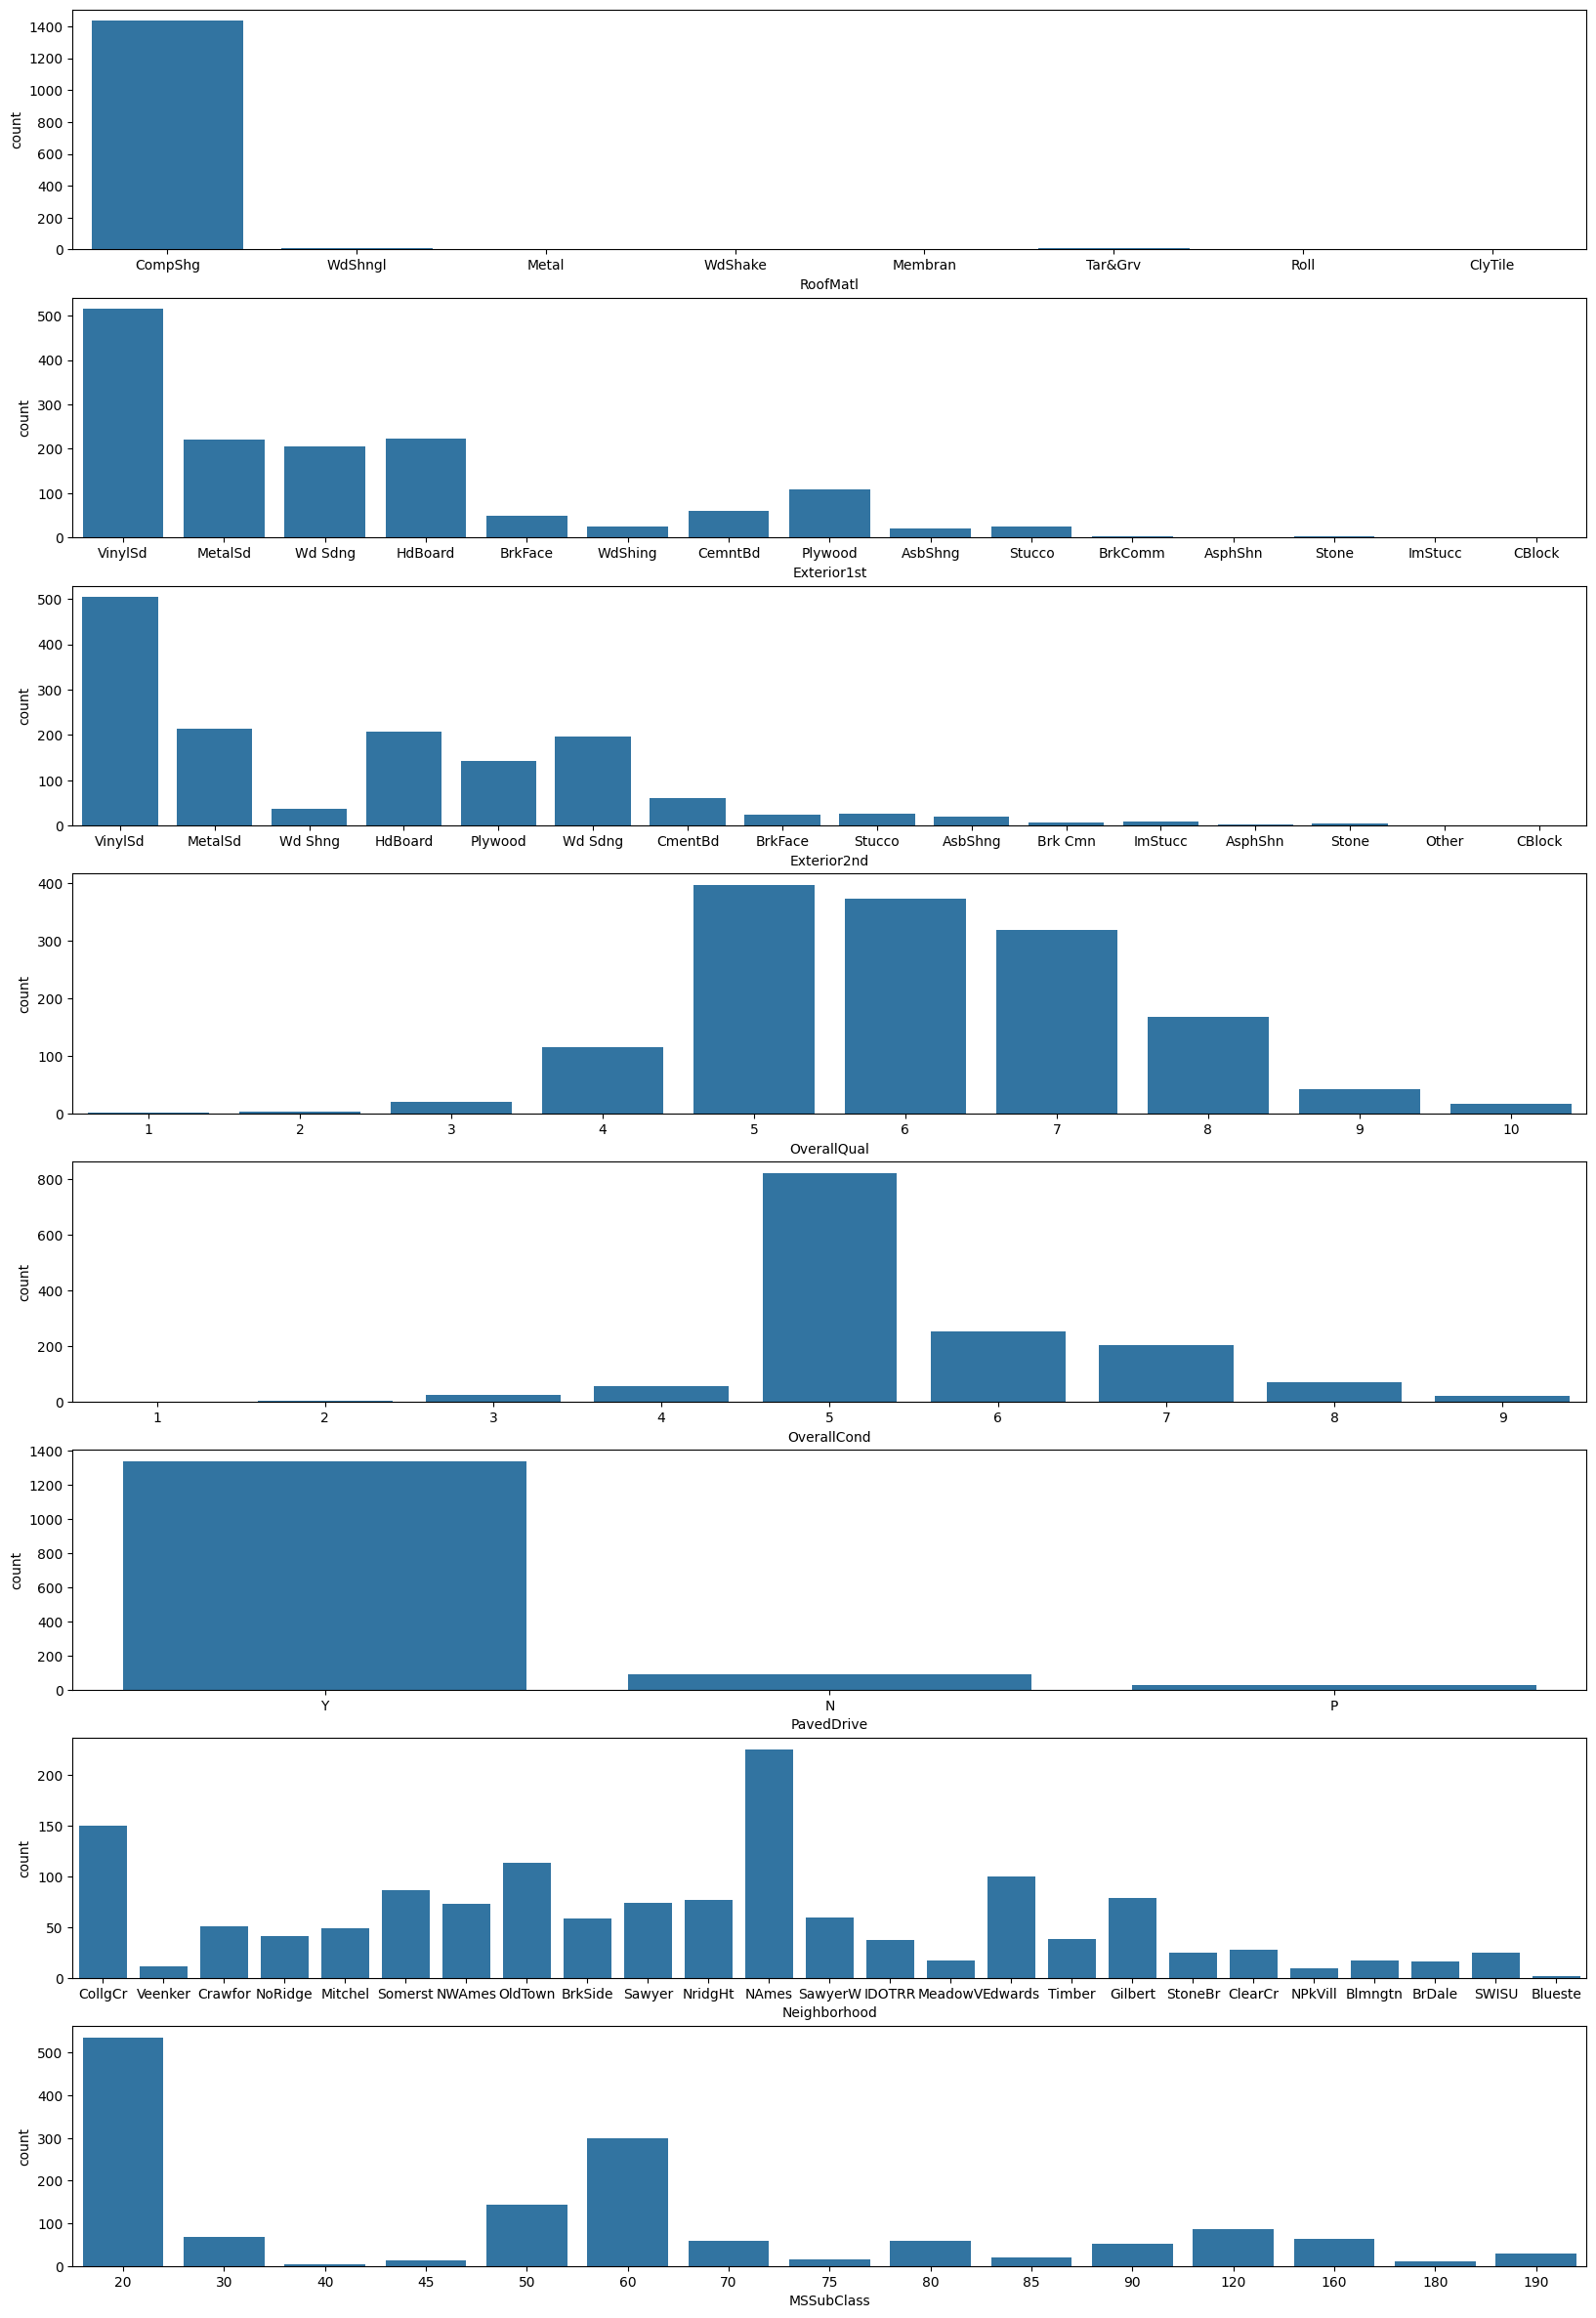

In [20]:
plt.figure(figsize=(20,30))

plt.subplot(8,1,1)
sns.countplot(x='RoofMatl',data=sh_datafile)

plt.subplot(8,1,2)
sns.countplot(x='Exterior1st',data=sh_datafile)


plt.subplot(8,1,3)
sns.countplot(x='Exterior2nd',data=sh_datafile)

plt.subplot(8,1,4)
sns.countplot(x='OverallQual',data=sh_datafile)

plt.subplot(8,1,5)
sns.countplot(x='OverallCond',data=sh_datafile)

plt.subplot(8,1,6)
sns.countplot(x='PavedDrive',data=sh_datafile)

plt.subplot(8,1,7)
sns.countplot(x='Neighborhood',data=sh_datafile)

plt.subplot(8,1,8)
sns.countplot(x='MSSubClass',data=sh_datafile)


plt.show()

Following attributes are identified to predominate with one value and will be dropped

1. RoofMatl
2. PavedDrive

Following columns will be combined

1. Exterior1st
    - CemntBd
    - BrkFace
    - AsbShng
    - Stucco
    - BrkComm
    - AsphShn
    - Stone
    - ImStucc
    - CBlock
2. Exterior2nd

     - CmentBd
     - BrkFace
     - Stucco
     - AsbShng
     - Brk Cmn
     - ImStucc
     - AsphShn
     - Stone
     - Other
     - CBlock
     - Wd Shng

3. OverallQual - Since it's qualitative and since many of the values will be combined

     - 1-4 = 4
     - 8-10 = 10

4. OverallCond - Since it's qualitative and since many of the values will be combined

     - 1-4 = 4
     - 8-9 = 9

Following columns will be combined

1. Neighborhood

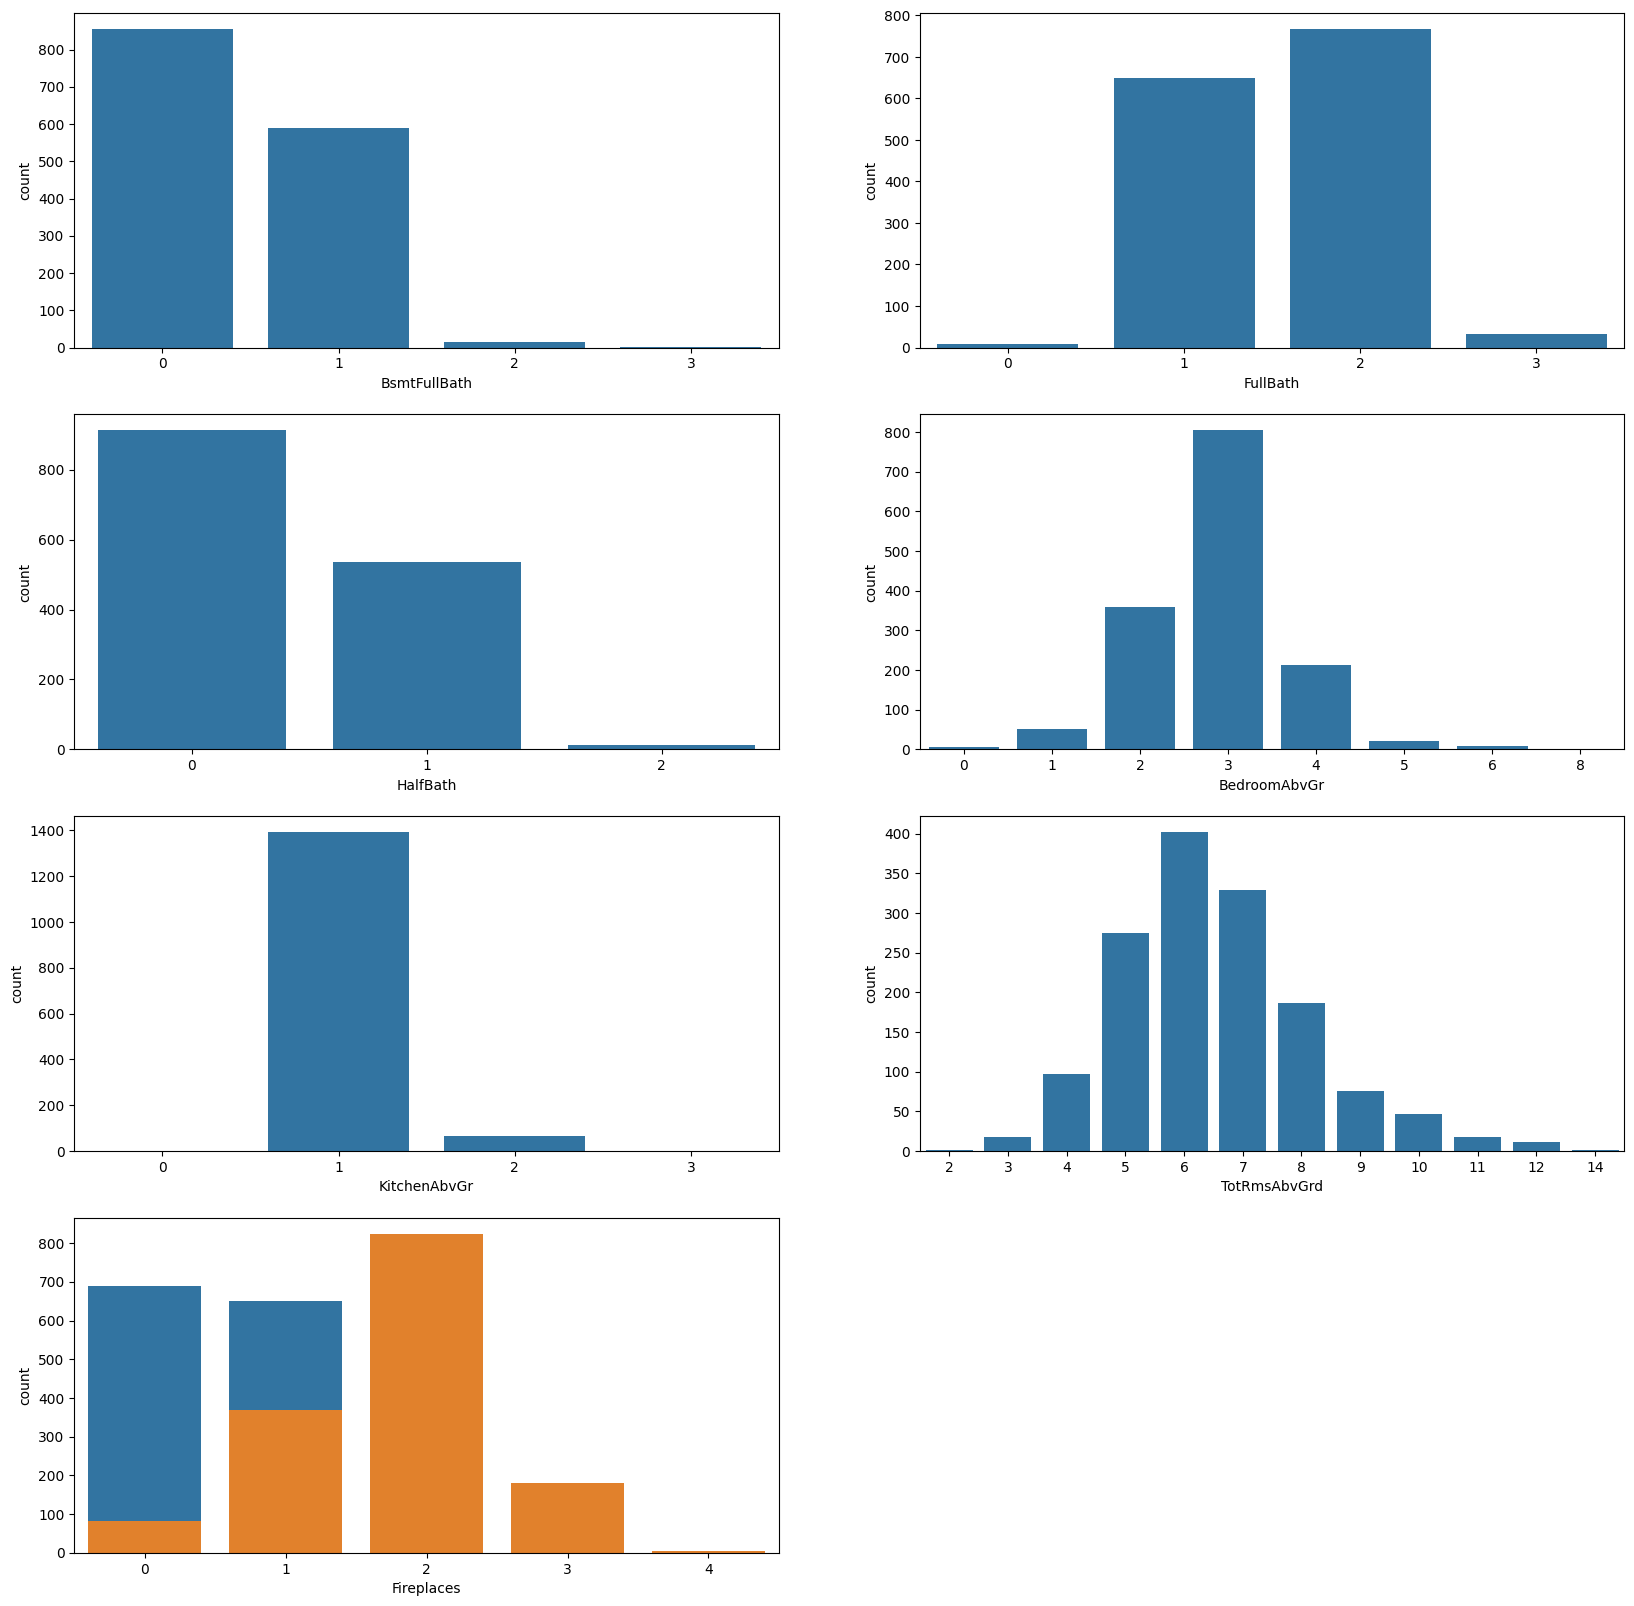

In [21]:
		 	 

plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.countplot(x='BsmtFullBath',data=sh_datafile)

plt.subplot(4,2,2)
sns.countplot(x='FullBath',data=sh_datafile)


plt.subplot(4,2,3)
sns.countplot(x='HalfBath',data=sh_datafile)

plt.subplot(4,2,4)
sns.countplot(x='BedroomAbvGr',data=sh_datafile)

plt.subplot(4,2,5)
sns.countplot(x='KitchenAbvGr',data=sh_datafile)

plt.subplot(4,2,6)
sns.countplot(x='TotRmsAbvGrd',data=sh_datafile)

plt.subplot(4,2,7)
sns.countplot(x='Fireplaces',data=sh_datafile)

plt.subplot(4,2,7)
sns.countplot(x='GarageCars',data=sh_datafile)

plt.show()

Following attributes are identified to predominate with one value and will be dropped

1. KitchenAbvGr




Tabulating the list of values before dropping them. 

In [22]:
selected_columns = ['GarageCond','GarageQual','BsmtFinType2','BsmtExposure','BsmtCond','Electrical','MSZoning','Street','LandContour','LandSlope','Condition1', \
                    'Condition2','BldgType','ExterCond','Heating','CentralAir','Functional','SaleType','SaleCondition','RoofMatl','Utilities','PavedDrive','KitchenAbvGr']


for column in selected_columns:
    value_counts = sh_datafile[column].value_counts()
    print(f"Value counts for {column}:\n{(value_counts/1460)*100}\n")


Value counts for GarageCond:
GarageCond
TA    96.369863
Fa     2.397260
Gd     0.616438
Po     0.479452
Ex     0.136986
Name: count, dtype: float64

Value counts for GarageQual:
GarageQual
TA    95.342466
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: count, dtype: float64

Value counts for BsmtFinType2:
BsmtFinType2
Unf    88.630137
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: count, dtype: float64

Value counts for BsmtExposure:
BsmtExposure
No    67.876712
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: count, dtype: float64

Value counts for BsmtCond:
BsmtCond
TA    92.328767
Gd     4.452055
Fa     3.082192
Po     0.136986
Name: count, dtype: float64

Value counts for Electrical:
Electrical
SBrkr    91.438356
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
Name: count, dtype: float64

Value counts for MSZoning:
MSZoning
RL         78.835616
RM         14.931507
FV          4.45205

In [23]:
sh_datafile.drop(selected_columns,axis=1,inplace=True)
sh_datafile.to_csv('train_temp.csv')

Following values will be combined, as outlined earlier.

In [24]:
# Fields to be combined

field_value_combined = pd.Series()


field_value_combined['Exterior1st'] = ['CemntBd','BrkFace','AsbShng','Stucco','BrkComm','AsphShn','Stone','ImStucc','CBlock']
field_value_combined['Exterior2nd'] = ['CmentBd','BrkFace','Stucco','AsbShng','Brk Cmn','ImStucc','AsphShn','Stone','Other','CBlock','Wd Shng']
field_value_combined['KitchenQual'] = ['Ex','Fa']
field_value_combined['HouseStyle'] = ['5Fin','5Unf','SFoyer','SLvl','5Unf','5Fin']
field_value_combined['ExterQual'] = ['Ex','Fa']
field_value_combined['Foundation'] = ['BrkTil','Wood','Slab','Stone']
field_value_combined['HeatingQC'] = ['Gd','Fa','Po']
field_value_combined['LotShape'] = ['IR2','IR3']
field_value_combined['LotConfig'] = ['FR2','CulDSac','FR3']

field_value_combined['GarageType'] = ['Carport','Basement','2Types']
field_value_combined['BsmtQual'] = ['Ex','Fa']

field_value_combined['BsmtFinType1'] = ['Rec','BLQ','LwQ']
field_value_combined['LotConfig'] = ['FR2','CulDSac','FR3']

print(field_value_combined)

for key, value in field_value_combined.items():
    sh_datafile[key] = sh_datafile[key].replace(value,'Others')


sh_datafile['OverallQual'] = sh_datafile['OverallQual'].replace([1,2,3,4],4)
sh_datafile['OverallQual'] = sh_datafile['OverallQual'].replace([8,9,10],10)

sh_datafile['OverallCond'] = sh_datafile['OverallCond'].replace([1,2,3,4],4)
sh_datafile['OverallCond'] = sh_datafile['OverallCond'].replace([8,9],9)


sh_datafile['OverallQual'] = sh_datafile['OverallQual'].replace({7:'Good',6:'Above Average',5:'Average',4:'Below Average',10:'Very Excellent'})
sh_datafile['OverallCond'] = sh_datafile['OverallCond'].replace({7:'Good',6:'Above Average',5:'Average',4:'Below Average',9:'Excellent'})

sh_datafile['MSSubClass'] = sh_datafile['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES', \
                                                                 50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',85:'SPLIT FOYER', \
                                                                90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES', \
                                                                160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
    
sh_datafile.to_csv('train_temp.csv')

Exterior1st     [CemntBd, BrkFace, AsbShng, Stucco, BrkComm, A...
Exterior2nd     [CmentBd, BrkFace, Stucco, AsbShng, Brk Cmn, I...
KitchenQual                                              [Ex, Fa]
HouseStyle                 [5Fin, 5Unf, SFoyer, SLvl, 5Unf, 5Fin]
ExterQual                                                [Ex, Fa]
Foundation                            [BrkTil, Wood, Slab, Stone]
HeatingQC                                            [Gd, Fa, Po]
LotShape                                               [IR2, IR3]
LotConfig                                     [FR2, CulDSac, FR3]
GarageType                            [Carport, Basement, 2Types]
BsmtQual                                                 [Ex, Fa]
BsmtFinType1                                      [Rec, BLQ, LwQ]
dtype: object


#### Step 1.7 : Convert the Categorical variables into dummies ####

In [25]:
sh_datafile.to_csv('train_temp.csv')
selected_columns = ['MSSubClass','LotShape','LotConfig','Neighborhood','HouseStyle','OverallQual','OverallCond','RoofStyle','Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtQual','BsmtFinType1', \
                    'HeatingQC','KitchenQual','GarageType','GarageFinish']

sh_datafile = pd.get_dummies(sh_datafile,selected_columns)
sh_datafile.to_csv('train_temp_1.csv')

sh_datafile.replace({True:1,False:0},inplace=True)

sh_datafile.to_csv('train_temp_2.csv')

#### Step 1.8 : Standardize the numeric variables ####

In [26]:
# Dropping the 5 most significant attributes to answer Question 3 on the assignment. This step will be commented. 

colums_to_be_dropped = ['MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES','MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', \
                        'MSSubClass_2-1/2 STORY ALL AGES','MSSubClass_2-STORY 1945 & OLDER','MSSubClass_2-STORY 1946 & NEWER'
                       ]

sh_datafile.drop(colums_to_be_dropped,axis=1,inplace=True)
sh_datafile.to_csv('train_temp.csv')

KeyError: "['MSSubClass_2-STORY 1945 & OLDER '] not found in axis"

Splitting the data into Testing and Training

In [ ]:
X = sh_datafile.drop('SalePrice',axis=1)
y= sh_datafile['SalePrice']



Sh_X_train, Sh_X_test, Sh_y_train, Sh_y_test = train_test_split(X,y,train_size=0.7,test_size = 0.3, random_state=57)

Sh_X_train.to_csv('train_temp_3.csv')
Sh_y_train.to_csv('train_temp_3_1.csv')

#### Step 1.8 : Using Minimax scaler to standardize numeric variables.

In [ ]:
selected_columns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea', \
                    'WoodDeckSF','OpenPorchSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars', \
                    'GarageArea','WoodDeckSF','OpenPorchSF']
minmax_scaler = MinMaxScaler()

for colum_to_be_trans in selected_columns:    
    Sh_X_train[colum_to_be_trans] = minmax_scaler.fit_transform(Sh_X_train[colum_to_be_trans].array.reshape(-1,1))

for colum_to_be_trans in selected_columns:    
    Sh_X_test[colum_to_be_trans] = minmax_scaler.transform(Sh_X_test[colum_to_be_trans].array.reshape(-1,1))

#Sh_X_train.info()
#Sh_X_train.head(5)

Sh_X_test.info()
Sh_X_test.head(5)



# Step 2: Build a Linear Regression #

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(Sh_X_train,Sh_y_train)

Use RFE to eliminate columns 

In [ ]:
#Cut down number of features to 50 using automated approach
rfe = RFE(linear_reg,n_features_to_select=50)
rfe.fit(Sh_X_train,Sh_y_train)

In [ ]:
#Columns selected by RFE and their weights
items_for_RFE = pd.DataFrame(list(zip(Sh_X_train.columns,rfe.support_,rfe.ranking_)),columns=['Field_Name','RFE Support','RFE Ranking'])
items_for_RFE.head(5)

items_for_RFE.sort_values(by='RFE Ranking',ascending=True).to_csv('train_temp_4.csv')

In [ ]:
def build_model(cols):
    Sh_X_train_sm = sm.add_constant(Sh_X_train[cols])
    lm = sm.OLS(Sh_y_train, Sh_X_train_sm).fit()
    print(lm.summary())
    return lm

In [ ]:
# Function to calculate VIFs and print them
def get_vif(cols):
    df1 = Sh_X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [ ]:
selected_columns = items_for_RFE[items_for_RFE['RFE Support'] == True].Field_Name
selected_columns.head(5)
type(selected_columns)

columns_to_be_removed contains the list of columns which would be removed based on RFE

In [ ]:
columns_to_be_removed = ['MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES', 'Foundation_PConc','Foundation_CBlock','ExterQual_TA','ExterQual_Others' \
                          'OverallQual_Good', 'BsmtQual_Others', 'Exterior1st_HdBoard','Exterior1st_MetalSd','Exterior1st_Others', \
                          'GarageFinish_Unf','OverallQual_Very Excellent','LotConfig_Others','KitchenQual_Gd','Exterior2nd_Others','HeatingQC_Ex','Exterior1st_VinylSd', \
                          'MSSubClass_1-STORY 1946 & NEWER ALL STYLES','LotConfig_Inside','Exterior2nd_VinylSd','KitchenQual_TA','Exterior2nd_Wd Sdng','Exterior1st_Plywood','MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER']
                    #      ,'Exterior2nd_Plywood','OverallQual_Good', \
                    #     'OverallQual_Below Average','OverallQual_Average','OverallQual_Above Average','LotConfig_Corner','Exterior2nd_HdBoard',,'OverallQual_Below Average' \
                    #    ,'HeatingQC_Others','HeatingQC_TA','KitchenQual_Others','GarageFinish_Fin','GarageFinish_RFn','Exterior2nd_MetalSd',    ]

for indiv_columns in columns_to_be_removed:
    selected_columns = selected_columns[selected_columns != indiv_columns]

Sh_X_train = Sh_X_train[selected_columns]
Sh_X_test = Sh_X_test[selected_columns]


Sh_X_train.head(5)
Sh_X_train.to_csv("train_temp_XTrain.csv")
Sh_y_train.to_csv("train_temp_yTrain.csv")

build_model(selected_columns)


In [ ]:
get_vif(selected_columns)

In [ ]:
linear_reg = linear_reg.fit(Sh_X_train[selected_columns],Sh_y_train)

print("Linear Intercepts:",linear_reg.intercept_)
print("Linear coefficient:",linear_reg.coef_)

Sh_y_train_pred = linear_reg.predict(Sh_X_train[selected_columns])

In [ ]:
sns.distplot(Sh_y_train-Sh_y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

Error terms follows a normal curve with mean as zero. 

Check the R-squared value for the Training data.

In [ ]:
#Print R-squared Value
r2_score(Sh_y_train,Sh_y_train_pred)

In [ ]:
plt.scatter(Sh_y_train,Sh_y_train-Sh_y_train_pred)
plt.show()

Except for large values of sale price, error seems to be distributed with no distinct pattern. The model is able to predict for the Test data except for large values of Sales price.

Now test using the model developed using Training data.

In [ ]:
Sh_y_test_pred = linear_reg.predict(Sh_X_test[selected_columns])

r2_score(Sh_y_test,Sh_y_test_pred)

Test prediction r2 score (0.69) is almost equal to the Training score(0.69)

# 3. Using Ridge Model for Prediction #

In [ ]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 0.25,0.5,0.75,10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(Sh_X_train, Sh_y_train) 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.to_csv('train_test_results_ridge.csv')

In [ ]:
# plotting mean test & train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting the graph
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Based on the chart and the above result, the optimum alpha value is 0.25, as predicted by Ridge Regression.

In [ ]:
#optimum alpha
alpha = 0.25

ridge = Ridge(alpha=alpha)

ridge.fit(Sh_X_train, Sh_y_train)
ridge.coef_

In [ ]:
ridge.score(Sh_X_train, Sh_y_train)

In [ ]:
ridge.score(Sh_X_test, Sh_y_test)

Training and testing score is almost equal to Linear Regression.

In [ ]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

# 4. Using Lasso Regression #

In [ ]:
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.1, 0.25,0.5,0.75,10,100,1000]}
lasso = Lasso()

# cross validation system
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(Sh_X_train, Sh_y_train)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

cv_results.to_csv('train_test_results_lasso.csv')

In [ ]:
# plotting the mean test and training scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Per the data the optimum value of alpha is 100.

In [ ]:
#optimum alpha
alpha =100

lasso = Lasso(alpha=alpha)
lasso.fit(Sh_X_train, Sh_y_train)

In [ ]:
lasso.coef_

In [ ]:
lasso.score(Sh_X_train, Sh_y_train)

In [ ]:
lasso.score(Sh_X_test, Sh_y_test)

In [ ]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

# 5. Conclusion #

The optimum value of Alpha in Ridge and Lasso regression as follows

1. Ridge Regression: .25
2. Lasso Regression: 100


Important predictor variables for Ridge and Lasso regression

Ridge Regression
- MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES - 19138.864
- MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES - 21389.867 
- MSSubClass_2-1/2 STORY ALL AGES - 22719.936
- MSSubClass_2-STORY 1945 & OLDER - 24881.734
- MSSubClass_2-STORY 1946 & NEWER - 57906.235

Lasso

 - MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES - 12217.06
 - MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES - 18559.398 
 - MSSubClass_2-1/2 STORY ALL AGES - 21215.956 
 - MSSubClass_2-STORY 1945 & OLDER - 22087.675
 - MSSubClass_2-STORY 1946 & NEWER - 56372.419


Comparing the K-fold test scope for the optimum values for Ridge (alpha = 0.25, mean test score = 0.662884363) and Lasso regression(alpha=100, mean test score=0.665487002736963), Lasso Regression is more suited.